# Подготовка данных

In [1]:
#import cx_Oracle
import numpy as np
import pandas as pd

In [2]:
#X = pd.read_csv('ML.txt')
X1 = pd.read_csv('ML.csv', sep=";")
X1.head()

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGEPSILONE,...,RATINGAVGLIFETIME,RATINGAGTDEVPRICE,RATINGAGTDEVVOL,RATINGCROSSTURNOVER1,RATINGCROSSTURNOVER2,RATINGCROSSVALUE,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,24.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,TRNF-3.19,FORTS,238 944
1,2.183220e+11,03.19.2019 10:00:07,1.0,3.0,0.0,8909.0,1.0,1.0,3.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,GMKR-3.19,FORTS,238 944
2,2.183220e+11,03.07.2019 16:31,1.0,2.0,0.0,788.0,1.0,3.0,2.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,TATN-3.19,FORTS,238 944
3,2.183220e+11,03.12.2019 11:10,1.0,3.0,0.0,1259.0,1.0,3.0,3.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,TATN-3.19,FORTS,238 944
4,2.183220e+11,03.25.2019 11:35:01,1.0,4.0,0.0,3395.0,0.0,1.0,4.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,3.0,GMKR-6.19,FORTS,238 944


In [3]:
# смотрим типы данных
X1.dtypes

SIGNAL_ID                float64
TRADEDATE                 object
CROSSTURNOVER1           float64
CROSSDEALRATIOS          float64
EPSILONE                 float64
PROFITPL                 float64
PROFITABILITYY           float64
SIGNALSK                 float64
RATINGCROSSDEALRATIOS    float64
RATINGEPSILONE           float64
RATINGPROFITPL           float64
RATINGPROFITABILITYY     float64
RATINGSIGNALSK           float64
RATINGINTEGRAL           float64
AGTDEV_BS                float64
AGTDEV_PRICE             float64
AGTDEV_VOL               float64
RATINGDEV                float64
TRADEDATE_LAST            object
EVENT_ID                 float64
CROSSTURNOVER2           float64
CROSSVALUE               float64
AVGLIFETIME              float64
RATINGAVGLIFETIME        float64
RATINGAGTDEVPRICE        float64
RATINGAGTDEVVOL          float64
RATINGCROSSTURNOVER1     float64
RATINGCROSSTURNOVER2     float64
RATINGCROSSVALUE         float64
USERGRADE_ID             float64
SHORTNAME 

# Удаление параметров

In [4]:
# удаляем все рейтинги
X1 = X1.drop(['RATINGCROSSDEALRATIOS','RATINGEPSILONE','RATINGPROFITPL','RATINGPROFITABILITYY','RATINGSIGNALSK','RATINGINTEGRAL','RATINGDEV','RATINGAVGLIFETIME','RATINGAGTDEVPRICE','RATINGAGTDEVVOL','RATINGCROSSTURNOVER1','RATINGCROSSTURNOVER2','RATINGCROSSVALUE'], axis=1)
X1

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,TRNF-3.19,FORTS,238 944
1,2.183220e+11,03.19.2019 10:00:07,1.0,3.0,0.0,8909.0,1.0,1.0,0.0,0.0,0.0,03.19.2019 22:40:57,NaN,0.0,10322523.0,NaN,4.0,GMKR-3.19,FORTS,238 944
2,2.183220e+11,03.07.2019 16:31,1.0,2.0,0.0,788.0,1.0,3.0,0.0,0.0,0.0,03.07.2019 22:20,NaN,0.0,456274.0,NaN,4.0,TATN-3.19,FORTS,238 944
3,2.183220e+11,03.12.2019 11:10,1.0,3.0,0.0,1259.0,1.0,3.0,0.0,0.0,0.0,03.12.2019 22:02,NaN,0.0,1187081.0,NaN,4.0,TATN-3.19,FORTS,238 944
4,2.183220e+11,03.25.2019 11:35:01,1.0,4.0,0.0,3395.0,0.0,1.0,0.0,0.0,0.0,03.25.2019 11:40:27,NaN,0.0,15728283.0,NaN,3.0,GMKR-6.19,FORTS,238 944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,2.183220e+11,03.29.2019 11:11:53,1.0,4.0,0.0,197.0,4.0,2.0,0.0,1.0,1.0,03.29.2019 18:33:12,NaN,0.0,37963.0,NaN,4.0,FXAURX,TQTF,238 944
6291,2.183220e+11,03.29.2019 10:13:40,1.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,03.29.2019 10:18:18,NaN,0.0,6075.0,NaN,4.0,TUCH,TQDE,238 944
6292,2.183220e+11,03.14.2019 10:28:59,1.0,4.0,0.0,340.0,19.0,1.0,0.0,1.0,2.0,03.14.2019 11:25:04,NaN,0.0,12980.0,NaN,4.0,ACKO,TQDE,238 944
6293,2.183220e+11,03.18.2019 10:03:53,1.0,7.0,0.0,340.0,18.0,1.0,0.0,1.0,2.0,03.18.2019 10:42:47,NaN,0.0,13660.0,NaN,4.0,ACKO,TQDE,238 944


In [5]:
# удаляем столбцы SECCODE, IDENT
X1 = X1.drop(['SHORTNAME','IDENT'], axis=1)
X1

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,238 944
1,2.183220e+11,03.19.2019 10:00:07,1.0,3.0,0.0,8909.0,1.0,1.0,0.0,0.0,0.0,03.19.2019 22:40:57,NaN,0.0,10322523.0,NaN,4.0,238 944
2,2.183220e+11,03.07.2019 16:31,1.0,2.0,0.0,788.0,1.0,3.0,0.0,0.0,0.0,03.07.2019 22:20,NaN,0.0,456274.0,NaN,4.0,238 944
3,2.183220e+11,03.12.2019 11:10,1.0,3.0,0.0,1259.0,1.0,3.0,0.0,0.0,0.0,03.12.2019 22:02,NaN,0.0,1187081.0,NaN,4.0,238 944
4,2.183220e+11,03.25.2019 11:35:01,1.0,4.0,0.0,3395.0,0.0,1.0,0.0,0.0,0.0,03.25.2019 11:40:27,NaN,0.0,15728283.0,NaN,3.0,238 944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,2.183220e+11,03.29.2019 11:11:53,1.0,4.0,0.0,197.0,4.0,2.0,0.0,1.0,1.0,03.29.2019 18:33:12,NaN,0.0,37963.0,NaN,4.0,238 944
6291,2.183220e+11,03.29.2019 10:13:40,1.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,03.29.2019 10:18:18,NaN,0.0,6075.0,NaN,4.0,238 944
6292,2.183220e+11,03.14.2019 10:28:59,1.0,4.0,0.0,340.0,19.0,1.0,0.0,1.0,2.0,03.14.2019 11:25:04,NaN,0.0,12980.0,NaN,4.0,238 944
6293,2.183220e+11,03.18.2019 10:03:53,1.0,7.0,0.0,340.0,18.0,1.0,0.0,1.0,2.0,03.18.2019 10:42:47,NaN,0.0,13660.0,NaN,4.0,238 944


In [6]:
# ищем пустые стобцы
print(X1.isnull().sum()) #кол-во пустых значений в столбцах

SIGNAL_ID             0
TRADEDATE             0
CROSSTURNOVER1        0
CROSSDEALRATIOS       0
EPSILONE              0
PROFITPL              0
PROFITABILITYY        0
SIGNALSK              0
AGTDEV_BS             0
AGTDEV_PRICE          0
AGTDEV_VOL            0
TRADEDATE_LAST        0
EVENT_ID           6295
CROSSTURNOVER2        0
CROSSVALUE            0
AVGLIFETIME        6295
USERGRADE_ID          0
DETECTION_ID          0
dtype: int64


In [7]:
# удаляем пустые стобцы
X1 = X1.drop(['EVENT_ID', 'AVGLIFETIME'], axis=1)
X1

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,4.0,238 944
1,2.183220e+11,03.19.2019 10:00:07,1.0,3.0,0.0,8909.0,1.0,1.0,0.0,0.0,0.0,03.19.2019 22:40:57,0.0,10322523.0,4.0,238 944
2,2.183220e+11,03.07.2019 16:31,1.0,2.0,0.0,788.0,1.0,3.0,0.0,0.0,0.0,03.07.2019 22:20,0.0,456274.0,4.0,238 944
3,2.183220e+11,03.12.2019 11:10,1.0,3.0,0.0,1259.0,1.0,3.0,0.0,0.0,0.0,03.12.2019 22:02,0.0,1187081.0,4.0,238 944
4,2.183220e+11,03.25.2019 11:35:01,1.0,4.0,0.0,3395.0,0.0,1.0,0.0,0.0,0.0,03.25.2019 11:40:27,0.0,15728283.0,3.0,238 944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,2.183220e+11,03.29.2019 11:11:53,1.0,4.0,0.0,197.0,4.0,2.0,0.0,1.0,1.0,03.29.2019 18:33:12,0.0,37963.0,4.0,238 944
6291,2.183220e+11,03.29.2019 10:13:40,1.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,03.29.2019 10:18:18,0.0,6075.0,4.0,238 944
6292,2.183220e+11,03.14.2019 10:28:59,1.0,4.0,0.0,340.0,19.0,1.0,0.0,1.0,2.0,03.14.2019 11:25:04,0.0,12980.0,4.0,238 944
6293,2.183220e+11,03.18.2019 10:03:53,1.0,7.0,0.0,340.0,18.0,1.0,0.0,1.0,2.0,03.18.2019 10:42:47,0.0,13660.0,4.0,238 944


In [13]:
# смотрим типы данных
X1.dtypes

SIGNAL_ID          float64
TRADEDATE           object
CROSSTURNOVER1     float64
CROSSDEALRATIOS    float64
EPSILONE           float64
PROFITPL           float64
PROFITABILITYY     float64
SIGNALSK           float64
AGTDEV_BS          float64
AGTDEV_PRICE       float64
AGTDEV_VOL         float64
TRADEDATE_LAST      object
CROSSTURNOVER2     float64
CROSSVALUE         float64
USERGRADE_ID       float64
DETECTION_ID        object
dtype: object

In [8]:
# проверка на уникальность значения во всех столбцах
for col in list(X1.columns):
        print(col, X1[col].unique())
        print()
print(len(X1['SIGNAL_ID'].unique()))

SIGNAL_ID [2.18322e+11]

TRADEDATE ['03.18.2019 15:01:21' '03.19.2019 10:00:07' '03.07.2019 16:31' ...
 '01.22.2019 21:10:08' '10.31.2018 16:03:07' '10.26.2018 14:26:38']

CROSSTURNOVER1 [1.]

CROSSDEALRATIOS [ 24.   3.   2.   4.   6.   1.  18.  40.  15.   5.   8.  59.   9.   7.
  23.  19. 100.  17.  16.  10.  11.  22.  12.  13.   0.  57.  14.  50.
  67.  28.  95.  31.  33.  21.  20.  41.  92.  74.  73.  25.  45.  29.
  36.  26.  51.  60.  52.  43.  30.  69.  77.  34.  75.  53.  37.  38.
  44.  32.  65.  27.  35.  89.  80.  46.  86.  42.  87.  47.  71.  70.
  66.  99.  79.  48.  63.  62.  84.  98.  72.  76.  49.  55.  97. 200.
  88.  56.  82.  93.  54. 115.  39.  90.  78.  91.  81.  58.  94.  96.
  68.  61.]

EPSILONE [0.]

PROFITPL [ 2290.  8909.   788. ... 43622. 23929.  4300.]

PROFITABILITYY [  1.   0.   4.   2.  11.   3.  49.  18.   5.  24.  12.  13.  15.   6.
  20.  16.   8.   9.  14.   7.  26.  32.  30.  22.  10.  76.  37.  17.
  43.  21.  29.  28.  41.  25.  19.  27.  36.  45. 

In [9]:
# удаляем столбцы с нулевой вариацией
X1 = X1.drop(['SIGNAL_ID','CROSSTURNOVER1','EPSILONE', 'AGTDEV_BS', 'DETECTION_ID'], axis=1)
X1

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,4.0
1,03.19.2019 10:00:07,3.0,8909.0,1.0,1.0,0.0,0.0,03.19.2019 22:40:57,0.0,10322523.0,4.0
2,03.07.2019 16:31,2.0,788.0,1.0,3.0,0.0,0.0,03.07.2019 22:20,0.0,456274.0,4.0
3,03.12.2019 11:10,3.0,1259.0,1.0,3.0,0.0,0.0,03.12.2019 22:02,0.0,1187081.0,4.0
4,03.25.2019 11:35:01,4.0,3395.0,0.0,1.0,0.0,0.0,03.25.2019 11:40:27,0.0,15728283.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6290,03.29.2019 11:11:53,4.0,197.0,4.0,2.0,1.0,1.0,03.29.2019 18:33:12,0.0,37963.0,4.0
6291,03.29.2019 10:13:40,9.0,1.0,0.0,1.0,1.0,1.0,03.29.2019 10:18:18,0.0,6075.0,4.0
6292,03.14.2019 10:28:59,4.0,340.0,19.0,1.0,1.0,2.0,03.14.2019 11:25:04,0.0,12980.0,4.0
6293,03.18.2019 10:03:53,7.0,340.0,18.0,1.0,1.0,2.0,03.18.2019 10:42:47,0.0,13660.0,4.0


# Переход к бинарной разметке переменной USERGRADE_ID
Все, что имеет USERGRADE_ID 2 и 3, превращаем в NOISE = 0
Все, что имеет USERGRADE_ID 4, превращаем в NOISE = 1

In [10]:
X1['NOISE'] = np.where((X1.USERGRADE_ID == 2) | (X1.USERGRADE_ID == 3), 0, 1)
X1

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID,NOISE
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,4.0,1
1,03.19.2019 10:00:07,3.0,8909.0,1.0,1.0,0.0,0.0,03.19.2019 22:40:57,0.0,10322523.0,4.0,1
2,03.07.2019 16:31,2.0,788.0,1.0,3.0,0.0,0.0,03.07.2019 22:20,0.0,456274.0,4.0,1
3,03.12.2019 11:10,3.0,1259.0,1.0,3.0,0.0,0.0,03.12.2019 22:02,0.0,1187081.0,4.0,1
4,03.25.2019 11:35:01,4.0,3395.0,0.0,1.0,0.0,0.0,03.25.2019 11:40:27,0.0,15728283.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6290,03.29.2019 11:11:53,4.0,197.0,4.0,2.0,1.0,1.0,03.29.2019 18:33:12,0.0,37963.0,4.0,1
6291,03.29.2019 10:13:40,9.0,1.0,0.0,1.0,1.0,1.0,03.29.2019 10:18:18,0.0,6075.0,4.0,1
6292,03.14.2019 10:28:59,4.0,340.0,19.0,1.0,1.0,2.0,03.14.2019 11:25:04,0.0,12980.0,4.0,1
6293,03.18.2019 10:03:53,7.0,340.0,18.0,1.0,1.0,2.0,03.18.2019 10:42:47,0.0,13660.0,4.0,1


In [11]:
# удаляем столбец USERGRADE_ID
X1 = X1.drop(['USERGRADE_ID'], axis=1)
X1

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,NOISE
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,1
1,03.19.2019 10:00:07,3.0,8909.0,1.0,1.0,0.0,0.0,03.19.2019 22:40:57,0.0,10322523.0,1
2,03.07.2019 16:31,2.0,788.0,1.0,3.0,0.0,0.0,03.07.2019 22:20,0.0,456274.0,1
3,03.12.2019 11:10,3.0,1259.0,1.0,3.0,0.0,0.0,03.12.2019 22:02,0.0,1187081.0,1
4,03.25.2019 11:35:01,4.0,3395.0,0.0,1.0,0.0,0.0,03.25.2019 11:40:27,0.0,15728283.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6290,03.29.2019 11:11:53,4.0,197.0,4.0,2.0,1.0,1.0,03.29.2019 18:33:12,0.0,37963.0,1
6291,03.29.2019 10:13:40,9.0,1.0,0.0,1.0,1.0,1.0,03.29.2019 10:18:18,0.0,6075.0,1
6292,03.14.2019 10:28:59,4.0,340.0,19.0,1.0,1.0,2.0,03.14.2019 11:25:04,0.0,12980.0,1
6293,03.18.2019 10:03:53,7.0,340.0,18.0,1.0,1.0,2.0,03.18.2019 10:42:47,0.0,13660.0,1


# Корреляционная матрица

In [12]:
# Create correlation matrix
corr_matrix = X1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print(to_drop)

# Drop features 
#X1.drop(to_drop, axis=1, inplace=True) # удаление если больше 0.70

['AGTDEV_VOL', 'CROSSTURNOVER2']


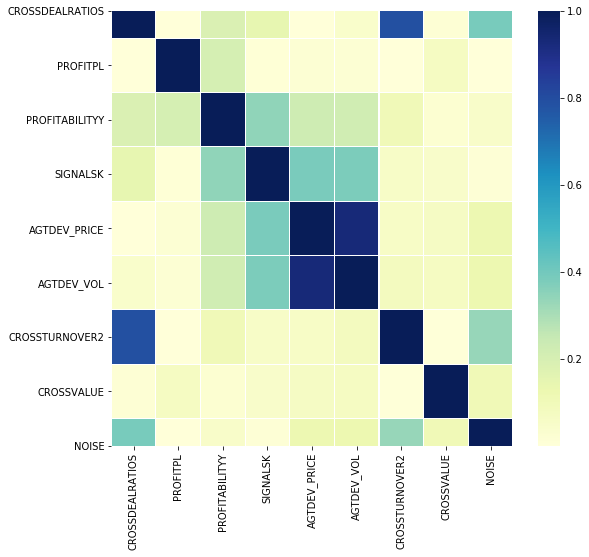

In [14]:
#print(corr_matrix)
from matplotlib import pyplot as plt
import seaborn as sns
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# Применяем метод главных компонент (PCA) к коррелированным переменным

In [15]:
# создаем список на основании скоррелированных переменных
x = X1.AGTDEV_VOL.values
y = X1.CROSSTURNOVER2.values
z = X1.AGTDEV_PRICE.values
yz = np.vstack((x,y,z))

In [16]:
# создаем компонену на основании скоррелированных переменных
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(yz))
XPCAreduced

array([[-1.14262734],
       [-1.14262734],
       [-1.14262734],
       ...,
       [ 1.01641932],
       [ 1.01641932],
       [ 0.26873058]])

In [17]:
# добавляем компоненту в датафрейм, удаляем скоррелированные переменные
X1['PCA'] = XPCAreduced
X1 = X1.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)
X1

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,TRADEDATE_LAST,CROSSVALUE,NOISE,PCA
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,03.18.2019 15:52:48,1732440.0,1,-1.142627
1,03.19.2019 10:00:07,3.0,8909.0,1.0,1.0,03.19.2019 22:40:57,10322523.0,1,-1.142627
2,03.07.2019 16:31,2.0,788.0,1.0,3.0,03.07.2019 22:20,456274.0,1,-1.142627
3,03.12.2019 11:10,3.0,1259.0,1.0,3.0,03.12.2019 22:02,1187081.0,1,-1.142627
4,03.25.2019 11:35:01,4.0,3395.0,0.0,1.0,03.25.2019 11:40:27,15728283.0,0,-1.142627
...,...,...,...,...,...,...,...,...,...
6290,03.29.2019 11:11:53,4.0,197.0,4.0,2.0,03.29.2019 18:33:12,37963.0,1,0.268731
6291,03.29.2019 10:13:40,9.0,1.0,0.0,1.0,03.29.2019 10:18:18,6075.0,1,0.268731
6292,03.14.2019 10:28:59,4.0,340.0,19.0,1.0,03.14.2019 11:25:04,12980.0,1,1.016419
6293,03.18.2019 10:03:53,7.0,340.0,18.0,1.0,03.18.2019 10:42:47,13660.0,1,1.016419


# Снова строим корреляционную матрицу, чтобы проверить, что получилось после применения PCA

In [18]:
# Create correlation matrix
corr_matrix = X1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print(to_drop)

# Drop features 
#X1.drop(to_drop, axis=1, inplace=True) # удаление если больше 0.70

[]


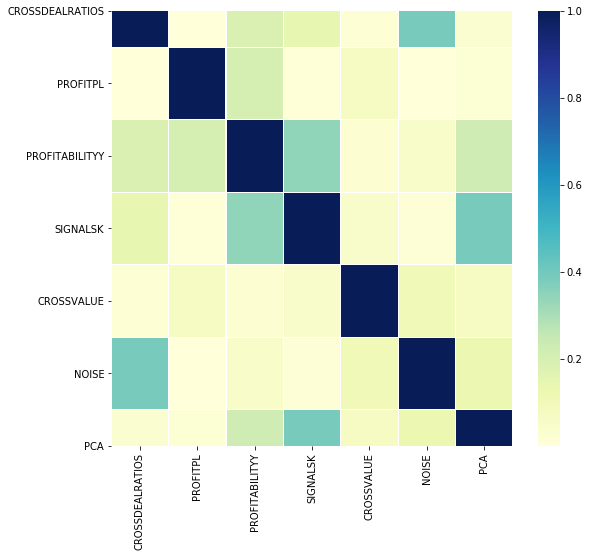

In [19]:
#print(corr_matrix)
from matplotlib import pyplot as plt
import seaborn as sns
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# Преобразование формата времени и вычисление длительности сигнала

In [20]:
#Преобразование типа дата
import datetime
X1['TRADEDATE_LAST'] = pd.to_datetime(pd.Series(X1['TRADEDATE_LAST'])) # object в datetime
X1['TRADEDATE'] = pd.to_datetime(pd.Series(X1['TRADEDATE']))
X1['DELTA'] = X1['TRADEDATE_LAST']- X1['TRADEDATE']
X1['DELTA'] = X1['DELTA'].astype('timedelta64[s]').astype('int') # в секундах
X1.head()

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,TRADEDATE_LAST,CROSSVALUE,NOISE,PCA,DELTA
0,2019-03-18 15:01:21,24.0,2290.0,1.0,3.0,2019-03-18 15:52:48,1732440.0,1,-1.142627,3087
1,2019-03-19 10:00:07,3.0,8909.0,1.0,1.0,2019-03-19 22:40:57,10322523.0,1,-1.142627,45650
2,2019-03-07 16:31:00,2.0,788.0,1.0,3.0,2019-03-07 22:20:00,456274.0,1,-1.142627,20940
3,2019-03-12 11:10:00,3.0,1259.0,1.0,3.0,2019-03-12 22:02:00,1187081.0,1,-1.142627,39120
4,2019-03-25 11:35:01,4.0,3395.0,0.0,1.0,2019-03-25 11:40:27,15728283.0,0,-1.142627,326


In [21]:
X1 = X1.drop(['TRADEDATE','TRADEDATE_LAST'], axis=1)
X1.head(10)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,CROSSVALUE,NOISE,PCA,DELTA
0,24.0,2290.0,1.0,3.0,1732440.0,1,-1.142627,3087
1,3.0,8909.0,1.0,1.0,10322523.0,1,-1.142627,45650
2,2.0,788.0,1.0,3.0,456274.0,1,-1.142627,20940
3,3.0,1259.0,1.0,3.0,1187081.0,1,-1.142627,39120
4,4.0,3395.0,0.0,1.0,15728283.0,0,-1.142627,326
5,3.0,2150.0,4.0,1.0,349250.0,1,-1.142627,35820
6,6.0,1358.0,1.0,1.0,932042.0,1,-1.142627,2371
7,1.0,1230.0,2.0,1.0,434610.0,1,-1.142627,2616
8,18.0,0.0,2.0,1.0,10.0,1,-1.142627,4507
9,40.0,0.0,0.0,1.0,2.0,1,-1.142627,4076


In [22]:
X1.describe()

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,CROSSVALUE,NOISE,PCA,DELTA
count,6295.000000,6.295000e+03,6295.000000,6295.000000,6.295000e+03,6295.000000,6.295000e+03,6295.000000
mean,13.783320,4.261895e+04,22.776966,101.397141,3.741278e+06,0.971882,7.849127e-15,10224.902939
std,22.772896,2.054396e+06,59.100009,195.901446,3.540189e+07,0.165322,9.819922e-01,10051.413653
min,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,0.000000,-1.165094e+00,0.000000
25%,3.000000,5.500000e+01,2.000000,2.000000,6.280000e+03,1.000000,-1.142627e+00,1753.500000
50%,5.000000,2.350000e+02,5.000000,8.000000,3.025000e+04,1.000000,2.687306e-01,6712.000000
75%,12.000000,1.262000e+03,16.000000,83.000000,2.255630e+05,1.000000,2.687306e-01,16860.500000
max,200.000000,1.587408e+08,730.000000,647.000000,1.237580e+09,1.000000,1.680089e+00,49767.000000


# Разделение выборки на train и test

In [24]:
# выделяем NOISE в отдельный датафрейм и удаляем из исходного
y1 = pd.DataFrame(X1['NOISE'], columns=['NOISE'])
X1 = X1.drop(['NOISE'], axis=1)

In [25]:
X1

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,CROSSVALUE,PCA,DELTA
0,24.0,2290.0,1.0,3.0,1732440.0,-1.142627,3087
1,3.0,8909.0,1.0,1.0,10322523.0,-1.142627,45650
2,2.0,788.0,1.0,3.0,456274.0,-1.142627,20940
3,3.0,1259.0,1.0,3.0,1187081.0,-1.142627,39120
4,4.0,3395.0,0.0,1.0,15728283.0,-1.142627,326
...,...,...,...,...,...,...,...
6290,4.0,197.0,4.0,2.0,37963.0,0.268731,26479
6291,9.0,1.0,0.0,1.0,6075.0,0.268731,278
6292,4.0,340.0,19.0,1.0,12980.0,1.016419,3365
6293,7.0,340.0,18.0,1.0,13660.0,1.016419,2334


In [26]:
y1

,NOISE
0,1
1,1
2,1
3,1
4,0
...,...
6290,1
6291,1
6292,1
6293,1


In [33]:
#разделим на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state = 123)

In [34]:
print (len(x_train), len(x_test), len(y_train), len(y_test))

4406 1889 4406 1889


In [29]:
#проверка на сбалансированность выборки
y_train.NOISE.value_counts()

1    4276
0     130
Name: NOISE, dtype: int64

In [30]:
y_test.NOISE.value_counts()

1    1842
0      47
Name: NOISE, dtype: int64

In [49]:
'''#увеличим выборку
from sklearn.utils import resample
df= X_train.copy()
df['USERGRADE_ID']=y_train['USERGRADE_ID']
# Separate majority and minority classes
df_majority = df[df.USERGRADE_ID==4.0]
df_minority = df[df.USERGRADE_ID==2.0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.USERGRADE_ID.value_counts()'''

4.0    4285
2.0    4000
Name: USERGRADE_ID, dtype: int64

In [51]:
'''#сократим класс
df= X_train.copy()
df['USERGRADE_ID']=y_train['USERGRADE_ID']
# Separate majority and minority classes
df_majority = df[df.USERGRADE_ID==4.0]
df_minority = df[df.USERGRADE_ID==2.0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=110,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.USERGRADE_ID.value_counts()'''

2.0    110
4.0    110
Name: USERGRADE_ID, dtype: int64

In [71]:
'''x_train=df_upsampled.copy()
y_train = pd.DataFrame()
y_train['USERGRADE_ID'] = x_train['USERGRADE_ID']
x_train = x_train.drop(['USERGRADE_ID'], axis=1)'''

In [74]:
'''df1=x_train.copy()
df1['USERGRADE_ID']=y_train['USERGRADE_ID']
df1.to_csv("train")
df2=X_test.copy()
df2['USERGRADE_ID']=y_test['USERGRADE_ID']
df2.to_csv("test")'''

# Загрузка данных

In [78]:
'''test = pd.read_csv('/Users/ekaterina/Desktop/w/работа/машинное обучение/test')
train = pd.read_csv('/Users/ekaterina/Desktop/w/работа/машинное обучение/train')'''

In [81]:
'''x_train = train.copy()
y_train = x_train['USERGRADE_ID']
x_train = x_train.drop(['USERGRADE_ID','Unnamed: 0'], axis=1)
x_test = test.copy()
y_test = x_test['USERGRADE_ID']
x_test = x_test.drop(['USERGRADE_ID','Unnamed: 0'], axis=1)'''

# Дерево решений

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [35]:
'''%%time

clf = tree.DecisionTreeClassifier()

#параметры, которые будем подбирать
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,20), 'min_samples_split': range(2,50, 2), 'min_samples_leaf': range(1,20)}

#cv - групп для кросс-валидации
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)

#обучение N деревьев, где N - число сочетаний parameters
grid_search_cv_clf.fit(x_train, y_train)

#просмотр параметров лучшего дерева
grid_search_cv_clf.best_params_ # {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 16}

#лучшее дерево
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(x_test, y_test)'''

KeyboardInterrupt: 

In [36]:
model1 = DecisionTreeClassifier(criterion = "gini", random_state = 123, max_depth=18, min_samples_leaf=1,min_samples_split = 16)
model1.fit(x_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [37]:
from sklearn.tree import export_graphviz
export_graphviz(model1, 'tree.dot', rounded = True,feature_names = list(x_train),class_names = ['4', '2'], filled = True)

[[  34   13]
 [   7 1835]]


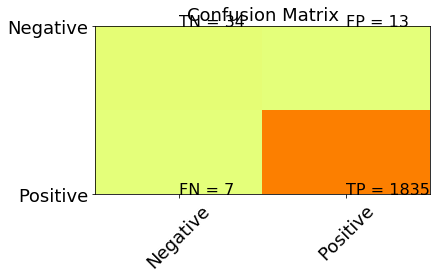

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_predicted = model1.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames, fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=16)
plt.show()

In [39]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
RESULTS = dict()
RESULTS['precision'] = precision_score(y_test, model1.predict(x_test), average='weighted')
RESULTS['recall'] = recall_score(y_test, model1.predict(x_test), average='weighted')
RESULTS['f1'] = f1_score(y_test, model1.predict(x_test), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, model1.predict(x_test))

In [40]:
to_report = dict()
to_report['DecisionTreeClassifier'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]

In [41]:
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F', 'accuracy']
result_table = np.round(result_table, 4)
result_table

,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.9889,0.9894,0.9891,0.9894


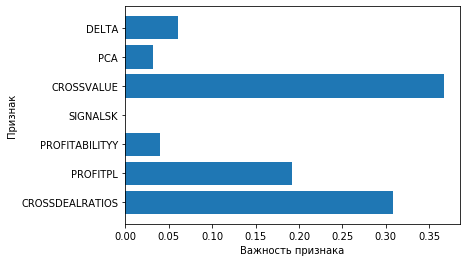

In [42]:
def plot_feature_importances(model):
    n_features = x_train.columns
    plt.barh(range(len(n_features)), model.feature_importances_)
    plt.yticks(np.arange(len(n_features)), x_train.columns)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances(model1)

In [43]:
for name, score in zip(x_train.columns, model1.feature_importances_):
 print(name, score)

CROSSDEALRATIOS 0.3082352977659195
PROFITPL 0.19153853410326666
PROFITABILITYY 0.04038047524472913
SIGNALSK 0.0
CROSSVALUE 0.3669821986205004
PCA 0.03207875507029838
DELTA 0.0607847391952859


# Метод k-ближайших соседей

In [44]:
from sklearn.neighbors import KNeighborsClassifier
#масштабируемо данные
# вычисляем минимальное значение для каждого признака обучающего набора
min_on_training = x_train.min(axis=0)
# вычисляем ширину диапазона для каждого признака (max - min) обучающего набора
range_on_training = (x_train - min_on_training).max(axis=0)
# вычитаем минимальное значение и затем делим на ширину диапазона
# min=0 и max=1 для каждого признака
x_train_scaled = (x_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(x_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(x_train_scaled.max(axis=0)))
x_test_scaled = (x_test - min_on_training) / range_on_training

Минимальное значение для каждого признака
CROSSDEALRATIOS    0.0
PROFITPL           0.0
PROFITABILITYY     0.0
SIGNALSK           0.0
CROSSVALUE         0.0
PCA                0.0
DELTA              0.0
dtype: float64
Максимальное значение для каждого признака
 CROSSDEALRATIOS    1.0
PROFITPL           1.0
PROFITABILITYY     1.0
SIGNALSK           1.0
CROSSVALUE         1.0
PCA                1.0
DELTA              1.0
dtype: float64


In [51]:
#подбор оптимального коли-ва соседей
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(x_train_scaled, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(x_train_scaled, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(x_test_scaled, y_test))

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A colum

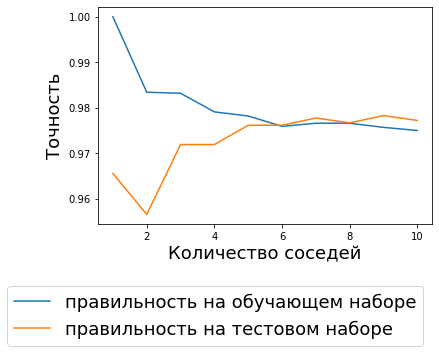

In [52]:
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Точность", fontsize=18)
plt.xlabel("Количество соседей", fontsize=18)
plt.legend(loc = 'lower right', fontsize=18, bbox_to_anchor=(1,-0.6))

In [85]:
model2 = KNeighborsClassifier(n_neighbors=7) #n_neighbor- количество соседей
model2.fit(x_train_scaled, y_train)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

[[   0   47]
 [   0 1842]]


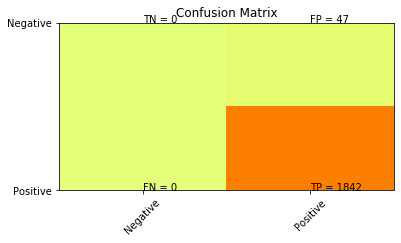

In [86]:
from sklearn.metrics import confusion_matrix
y_predicted = model2.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [87]:
RESULTS['precision'] = precision_score(y_test, model2.predict(x_test_scaled), average='weighted')
RESULTS['recall'] = recall_score(y_test, model2.predict(x_test_scaled), average='weighted')
RESULTS['f1'] = f1_score(y_test, model2.predict(x_test_scaled), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, model2.predict(x_test_scaled))

In [88]:
to_report['KNeighborsClassifier'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]

In [89]:
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 4)
result_table

,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.9889,0.9894,0.9891,0.9894
KNeighborsClassifier,0.9743,0.9778,0.9755,0.9778


# Svm-алгоритм (радиальное ядро)

In [90]:
from sklearn.svm import SVC

In [91]:
#радиальное ядро
svc_rbf = SVC(kernel='rbf', C = 8, gamma = 1, random_state=123)
svc_rbf.fit(x_train_scaled, y_train)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

[[   0   47]
 [   0 1842]]


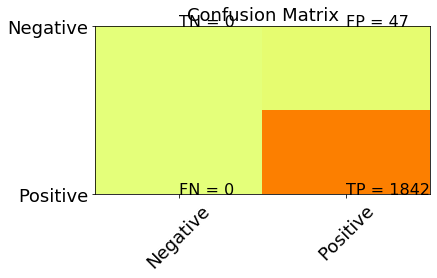

In [92]:
from sklearn.metrics import confusion_matrix
y_predicted = svc_rbf.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames, fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=16)
plt.show()

In [93]:
RESULTS['precision'] = precision_score(y_test, svc_rbf.predict(x_test_scaled), average='weighted')
RESULTS['recall'] = recall_score(y_test, svc_rbf.predict(x_test_scaled), average='weighted')
RESULTS['f1'] = f1_score(y_test, svc_rbf.predict(x_test_scaled), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, svc_rbf.predict(x_test_scaled))
to_report['SVC_rbf'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 3)
result_table

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.989,0.989,0.989,0.989
KNeighborsClassifier,0.974,0.978,0.976,0.978
SVC_rbf,0.951,0.975,0.963,0.975


# Svm-алгоритм (линейное ядро)


In [94]:
svc_linear= SVC(kernel='linear', C = 1, random_state=123)
svc_linear.fit(x_train_scaled, y_train)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

[[   0   47]
 [   0 1842]]


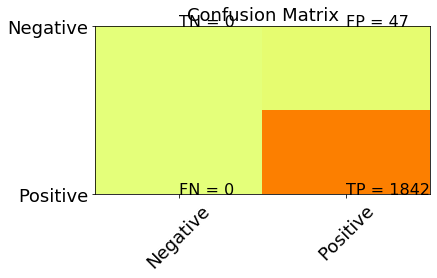

In [95]:
from sklearn.metrics import confusion_matrix
y_predicted = svc_linear.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames, fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=16)
plt.show()

In [96]:
RESULTS['precision'] = precision_score(y_test, svc_linear.predict(x_test_scaled), average='weighted')
RESULTS['recall'] = recall_score(y_test, svc_linear.predict(x_test_scaled), average='weighted')
RESULTS['f1'] = f1_score(y_test, svc_linear.predict(x_test_scaled), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, svc_linear.predict(x_test_scaled))
to_report['SVC_linear'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 3)
result_table

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.989,0.989,0.989,0.989
KNeighborsClassifier,0.974,0.978,0.976,0.978
SVC_rbf,0.951,0.975,0.963,0.975
SVC_linear,0.951,0.975,0.963,0.975


# Случайный лес

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

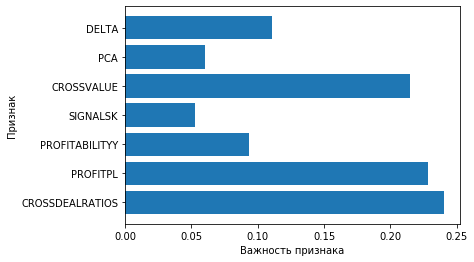

In [99]:
plot_feature_importances(forest)

[[  26   21]
 [  10 1832]]


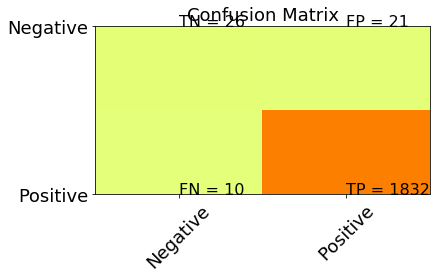

In [100]:
from sklearn.metrics import confusion_matrix
y_predicted = forest.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames, fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=16)
plt.show()

In [101]:
RESULTS['precision'] = precision_score(y_test, forest.predict(x_test), average='weighted')
RESULTS['recall'] = recall_score(y_test, forest.predict(x_test), average='weighted')
RESULTS['f1'] = f1_score(y_test, forest.predict(x_test), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, forest.predict(x_test))
to_report['Random_Forest'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 3)
result_table

,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.989,0.989,0.989,0.989
KNeighborsClassifier,0.974,0.978,0.976,0.978
SVC_rbf,0.951,0.975,0.963,0.975
SVC_linear,0.951,0.975,0.963,0.975
Random_Forest,0.982,0.984,0.983,0.984


# Случайный лес (перебор параметров)

n_estimators — число «деревьев» в «случайном лесу». max_features — число признаков для выбора расщепления. max_depth — максимальная глубина деревьев. min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться. min_samples_leaf — минимальное число объектов в листьях. bootstrap — использование для построения деревьев подвыборки с возвращением.

In [102]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
forest_1 = RandomizedSearchCV(forest, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=123)
forest_1.fit(x_train, y_train)
forest_1.best_params_
# {'n_estimators' 200: ,
# 'min_samples_split': 50 ,
# 'min_samples_leaf': 2,
# 'max_features': 'log2',
# 'max_depth': 13 ,
# 'bootstrap': False }

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 100,
 'min_samples_split': 39,
 'min_samples_leaf': 18,
 'max_features': 'log2',
 'max_depth': 13,
 'bootstrap': False}

In [103]:
rs_df = pd.DataFrame(forest_1.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,300,7,2,sqrt,12,True,0.980254,1
1,100,39,18,log2,13,False,0.980254,1
2,800,2,28,sqrt,8,False,0.980027,3
3,700,12,2,log2,4,False,0.980027,3
4,200,34,23,sqrt,12,False,0.980027,3
5,200,23,18,log2,7,False,0.980027,3
6,300,2,7,log2,11,False,0.980027,3
7,200,12,18,sqrt,12,False,0.979800,8
8,1000,2,23,sqrt,13,False,0.979800,8
9,200,50,2,log2,13,False,0.979800,8


Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

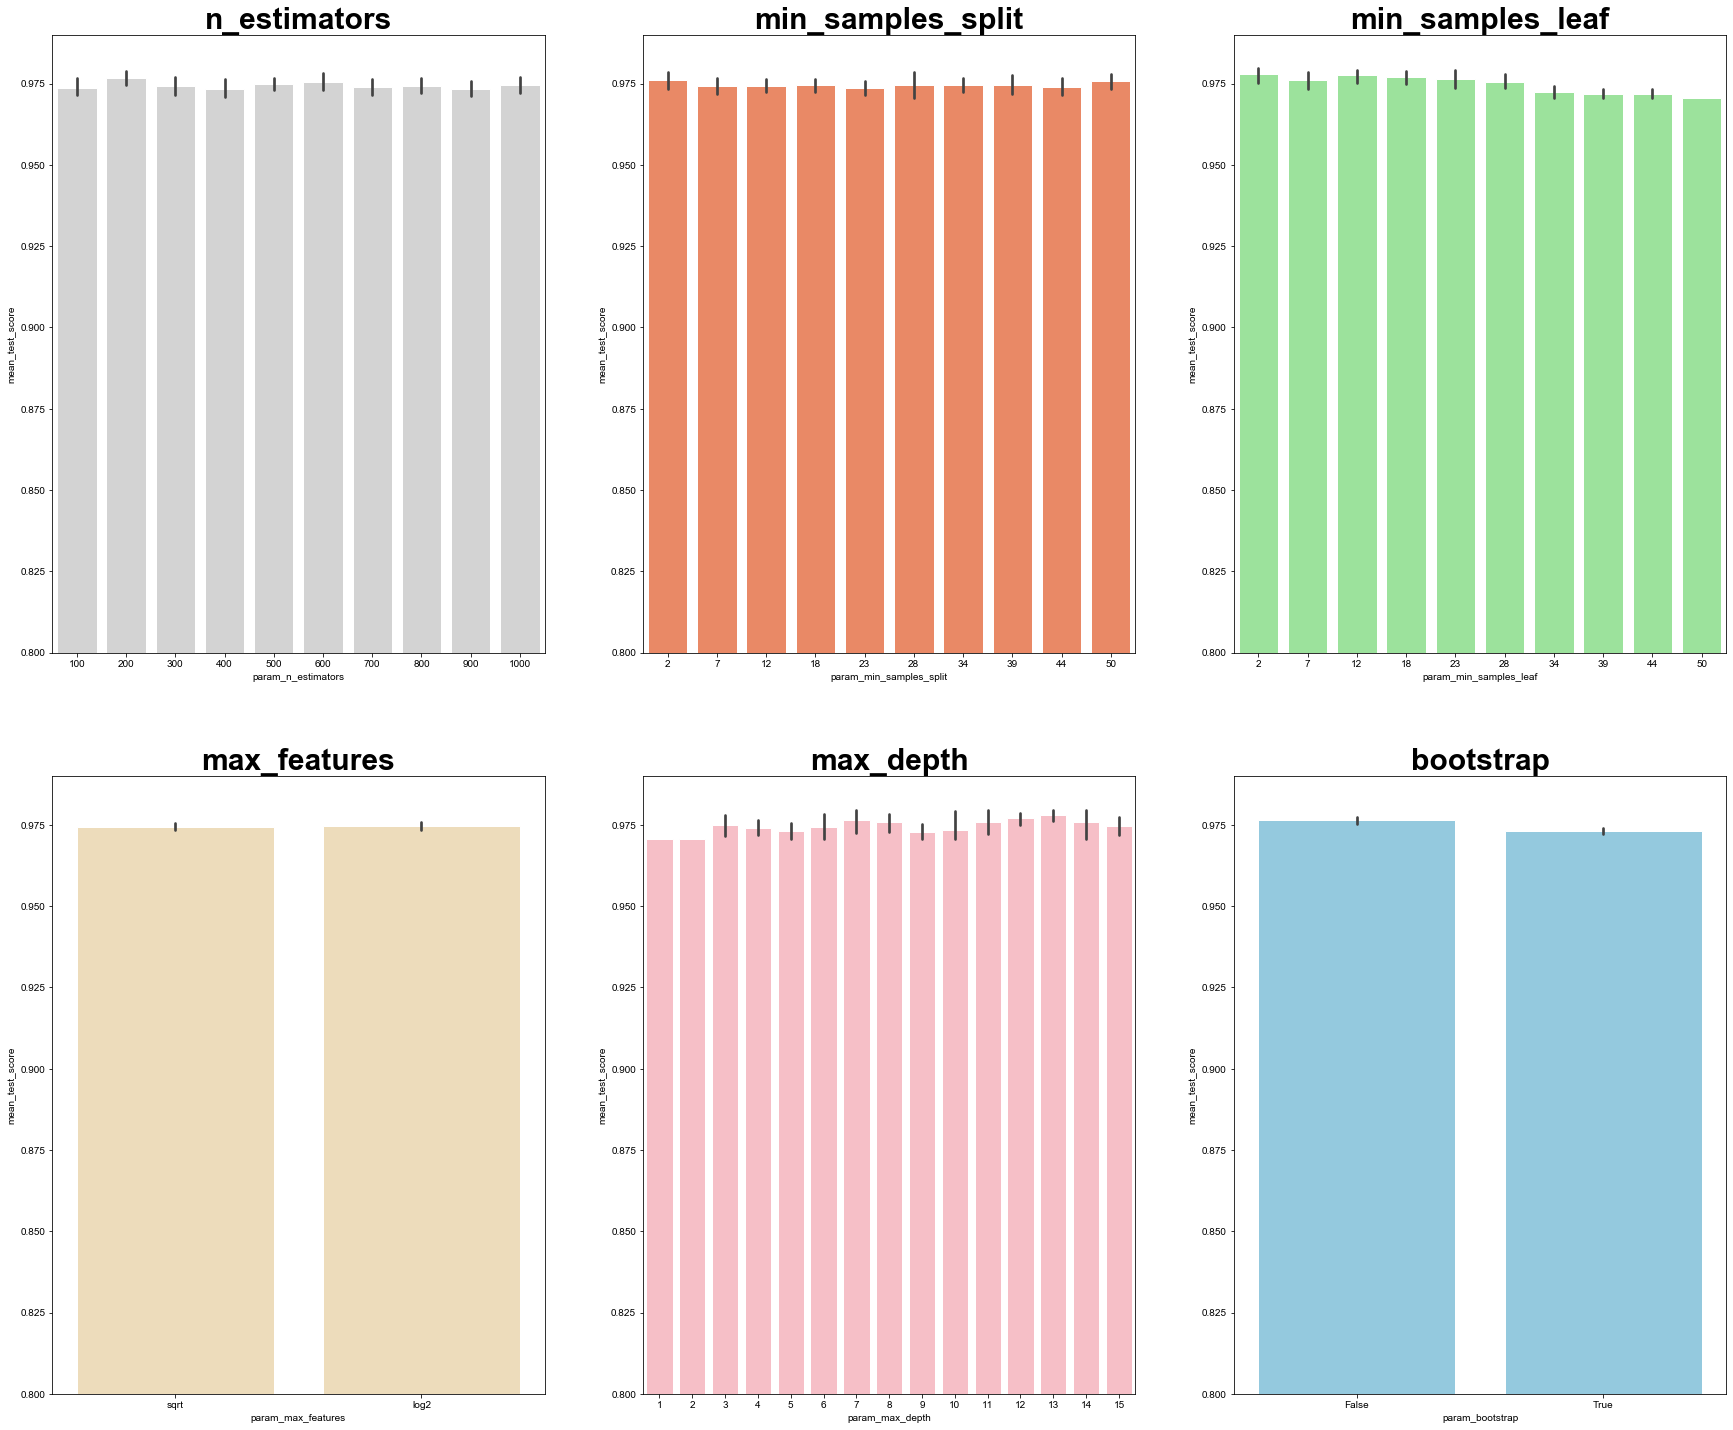

In [104]:
import seaborn as sns
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.80,.99])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.80,.99])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.99])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.80,.99])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.99])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.80,.99])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [105]:
#поиск оптимальных параметров
from sklearn.model_selection import GridSearchCV
n_estimators = [200,400,500]
max_features = ['sqrt']
max_depth = [12,13,14,15]
min_samples_split = [18, 34, 44, 50]
min_samples_leaf = [12,28,50]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
forest_best1 = GridSearchCV(forest, param_grid, cv = 5, verbose = 1, n_jobs=-1)
forest_best1.fit(x_train, y_train)
forest1 = forest_best1.best_estimator_
forest_best1.best_params_
# {'bootstrap': False,
# 'max_depth': 12 ,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 12,
# 'min_samples_split': 18,
# 'n_estimators': 500 }

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  9.6min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 28,
 'min_samples_split': 34,
 'n_estimators': 200}

In [106]:
forest_GridSearchCV = RandomForestClassifier(bootstrap = False, max_depth=12, max_features= 'sqrt', min_samples_leaf = 12, min_samples_split = 18, n_estimators= 500, random_state= 123)
forest_GridSearchCV.fit(x_train, y_train)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

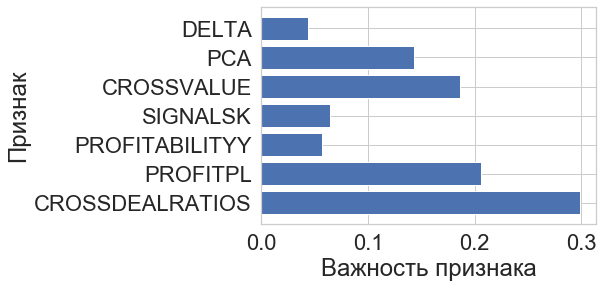

In [107]:
plot_feature_importances(forest_GridSearchCV)

[[  21   26]
 [   5 1837]]


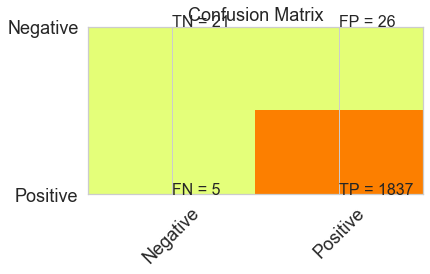

In [108]:
from sklearn.metrics import confusion_matrix
y_predicted = forest_GridSearchCV.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames, fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=16)
plt.show()

In [109]:
RESULTS['precision'] = precision_score(y_test, forest_GridSearchCV.predict(x_test), average='weighted')
RESULTS['recall'] = recall_score(y_test, forest_GridSearchCV.predict(x_test), average='weighted')
RESULTS['f1'] = f1_score(y_test, forest_GridSearchCV.predict(x_test), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, forest_GridSearchCV.predict(x_test))
to_report['Random_Forest_GridSearchCV'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 3)
result_table

,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.989,0.989,0.989,0.989
KNeighborsClassifier,0.974,0.978,0.976,0.978
SVC_rbf,0.951,0.975,0.963,0.975
SVC_linear,0.951,0.975,0.963,0.975
Random_Forest,0.982,0.984,0.983,0.984
Random_Forest_GridSearchCV,0.982,0.984,0.981,0.984


# Случайный лес (перебор параметров)

In [110]:
forest_RandomizedSearchCV = RandomForestClassifier(bootstrap = False, max_depth=13, max_features= 'log2', min_samples_leaf = 2, min_samples_split = 50, n_estimators= 200, random_state= 123)
forest_RandomizedSearchCV.fit(x_train, y_train)
# {'n_estimators' 200: ,
# 'min_samples_split': 50 ,
# 'min_samples_leaf': 2,
# 'max_features': 'log2',
# 'max_depth': 13 ,
# 'bootstrap': False }

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=13, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

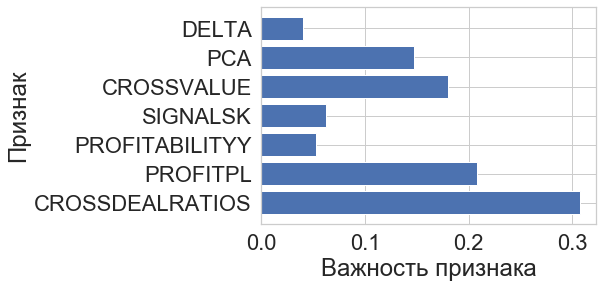

In [111]:
plot_feature_importances(forest_RandomizedSearchCV)

[[  22   25]
 [   4 1838]]


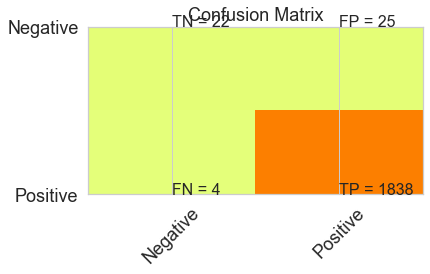

In [112]:
from sklearn.metrics import confusion_matrix
y_predicted = forest_RandomizedSearchCV.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames, fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=16)
plt.show()

In [113]:
RESULTS['precision'] = precision_score(y_test, forest_RandomizedSearchCV.predict(x_test), average='weighted')
RESULTS['recall'] = recall_score(y_test, forest_RandomizedSearchCV.predict(x_test), average='weighted')
RESULTS['f1'] = f1_score(y_test, forest_RandomizedSearchCV.predict(x_test), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, forest_RandomizedSearchCV.predict(x_test))
to_report['Random_Forest_RandomizedSearchCV'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 3)
result_table

,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.989,0.989,0.989,0.989
KNeighborsClassifier,0.974,0.978,0.976,0.978
SVC_rbf,0.951,0.975,0.963,0.975
SVC_linear,0.951,0.975,0.963,0.975
Random_Forest,0.982,0.984,0.983,0.984
Random_Forest_GridSearchCV,0.982,0.984,0.981,0.984
Random_Forest_RandomizedSearchCV,0.983,0.985,0.982,0.985


# Градиентный бустинг

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
boosting=GradientBoostingClassifier(random_state=123)
boosting.fit(x_train,y_train)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[[  29   18]
 [  15 1827]]


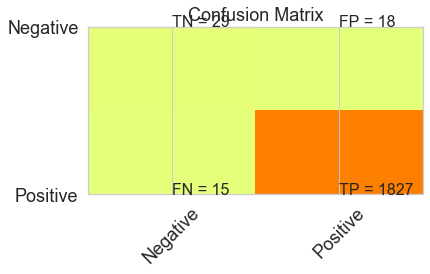

In [116]:
from sklearn.metrics import confusion_matrix
y_predicted = boosting.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames, fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=16)
plt.show()

In [117]:
RESULTS['precision'] = precision_score(y_test, boosting.predict(x_test), average='weighted')
RESULTS['recall'] = recall_score(y_test, boosting.predict(x_test), average='weighted')
RESULTS['f1'] = f1_score(y_test, boosting.predict(x_test), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, boosting.predict(x_test))
to_report['Gradient_Boosting'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 3)
result_table

,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.989,0.989,0.989,0.989
KNeighborsClassifier,0.974,0.978,0.976,0.978
SVC_rbf,0.951,0.975,0.963,0.975
SVC_linear,0.951,0.975,0.963,0.975
Random_Forest,0.982,0.984,0.983,0.984
Random_Forest_GridSearchCV,0.982,0.984,0.981,0.984
Random_Forest_RandomizedSearchCV,0.983,0.985,0.982,0.985
Gradient_Boosting,0.982,0.983,0.982,0.983


# Градиентный бустинг (перебор параметров)

In [118]:
%%time
parameters = {'n_estimators': [100, 150, 200, 300], 'learning_rate': [0.1,0.5,1], 'max_depth': [3,5,7,10], 'min_samples_split': [2,5,7,10,15,20], 'min_samples_leaf': [1,2,5,7,10]}
grid_search_cv_clf = GridSearchCV(boosting, parameters, cv=5, n_jobs=-1)
grid_search_cv_clf.fit(x_train, y_train)
best_clf = grid_search_cv_clf.best_estimator_
grid_search_cv_clf.best_params_
#{'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 45.7 s, sys: 2.96 s, total: 48.7 s
Wall time: 46min 4s


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 300}

In [119]:
boosting_GridSearchCV=GradientBoostingClassifier(learning_rate= 1, max_depth=5, min_samples_leaf=5, min_samples_split=2,n_estimators=100,random_state=123)
boosting_GridSearchCV.fit(x_train,y_train)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=5, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=5,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='auto', random_state=123, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

[[  17   30]
 [  61 1781]]


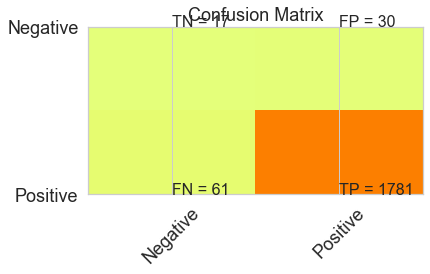

In [120]:
from sklearn.metrics import confusion_matrix
y_predicted = boosting_GridSearchCV.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45, fontsize=18)
plt.yticks(tick_marks, classNames,fontsize=18)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]),fontsize=16)
plt.show()

In [121]:
RESULTS['precision'] = precision_score(y_test, boosting_GridSearchCV.predict(x_test), average='weighted')
RESULTS['recall'] = recall_score(y_test, boosting_GridSearchCV.predict(x_test), average='weighted')
RESULTS['f1'] = f1_score(y_test, boosting_GridSearchCV.predict(x_test), average='weighted')
RESULTS['accuracy'] = accuracy_score(y_test, boosting_GridSearchCV.predict(x_test))
to_report['Gradient_Boosting__GridSearchCV'] = [RESULTS['precision'], RESULTS['recall'], RESULTS['f1'],RESULTS['accuracy']]
result_table = pd.DataFrame.from_dict(to_report).transpose()
result_table.columns = ['Recall', 'Precision', 'F','accuracy']
result_table = np.round(result_table, 3)
result_table

,Recall,Precision,F,accuracy
DecisionTreeClassifier,0.989,0.989,0.989,0.989
KNeighborsClassifier,0.974,0.978,0.976,0.978
SVC_rbf,0.951,0.975,0.963,0.975
SVC_linear,0.951,0.975,0.963,0.975
Random_Forest,0.982,0.984,0.983,0.984
Random_Forest_GridSearchCV,0.982,0.984,0.981,0.984
Random_Forest_RandomizedSearchCV,0.983,0.985,0.982,0.985
Gradient_Boosting,0.982,0.983,0.982,0.983
Gradient_Boosting__GridSearchCV,0.964,0.952,0.958,0.952
